Analyzing Immigration of Canada from 1980 to 2013


In [42]:
world

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import folium


Data Collection


In [2]:
data = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                     skiprows = range(20),
                     sheet_name='Canada by Citizenship',
                     skipfooter=2,
                     engine='openpyxl'
                    )
data.head(5)


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,...,3774.0,4331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'], dtype=object)

Data Cleaning


In [5]:
data.drop(['AREA','REG','DEV','Type','Coverage','Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'],axis = 1,inplace=True)
data.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,...,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,...,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0


In [7]:
data.rename(columns = {'OdName' : 'Country' , 'AreaName' : 'Continent' , 'RegName' : 'Region'} , inplace = True)
data.columns.values


array(['Country', 'Continent', 'Region', 'DevName', 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

In [8]:
#sum of Immigration from 1980 to 2013
data['Total'] = data.sum(axis = 1)


In [9]:
data.isnull().sum()

Country      816
Continent    816
Region       816
DevName      816
1980         816
1981         816
1982         816
1983         816
1984         816
1985         816
1986         816
1987         816
1988         816
1989         816
1990         816
1991         816
1992         816
1993         816
1994         816
1995         816
1996         816
1997         816
1998         816
1999         816
2000         816
2001         816
2002         816
2003         816
2004         816
2005         816
2006         816
2007         816
2008         816
2009         816
2010         816
2011         816
2012         816
2013         816
Total          0
dtype: int64

In [14]:
data.dropna(axis = 0,inplace =True)


In [17]:
data.set_index('Country',inplace = True)
data.head(5)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0
Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,...,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0


Exploratory Data Analysis with Visualizing 


In [18]:
data.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.00000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02
mean,1453.167513,1306.000000,1230.203046,905.431472,896.162437,856.304569,1008.639594,1543.908629,1640.456853,1944.670051,...,2662.35533,2554.720812,2403.583756,2510.091371,2560.101523,2849.614213,2525.360406,2618.304569,2629.654822,7.029657e+04
std,10784.524807,9449.373841,8864.905615,6503.149859,6452.570413,6155.858422,7205.630681,11045.558746,11809.252241,13939.908653,...,19104.65330,18261.461660,17129.490442,17908.071420,18276.881231,20386.174875,18082.496369,18763.159434,18838.224387,5.004158e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,29.00000,26.000000,32.000000,32.000000,37.000000,42.000000,38.000000,43.000000,45.000000,9.520000e+02
50%,14.000000,10.000000,12.000000,12.000000,14.000000,17.000000,21.000000,33.000000,36.000000,45.000000,...,211.00000,230.000000,198.000000,205.000000,217.000000,216.000000,196.000000,235.000000,217.000000,5.866000e+03
75%,266.000000,299.000000,299.000000,197.000000,207.000000,202.000000,257.000000,467.000000,476.000000,538.000000,...,857.00000,856.000000,975.000000,975.000000,917.000000,953.000000,851.000000,799.000000,852.000000,2.331000e+04
max,143137.000000,128641.000000,121175.000000,89185.000000,88272.000000,84346.000000,99351.000000,152075.000000,161585.000000,191550.000000,...,262242.00000,251640.000000,236753.000000,247244.000000,252170.000000,280687.000000,248748.000000,257903.000000,259021.000000,6.924212e+06


In [21]:
 # top 5 countries that contributed the most to immigration to Canada.   
data.sort_values(by = 'Total', ascending=False, axis=0, inplace=True)
data.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,...,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0,691904.0
China,Asia,Eastern Asia,Developing regions,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,...,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,...,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0,551500.0
Philippines,Asia,South-Eastern Asia,Developing regions,6051.0,5921.0,5249.0,4562.0,3801.0,3150.0,4166.0,...,18139.0,18400.0,19837.0,24887.0,28573.0,38617.0,36765.0,34315.0,29544.0,511391.0
Pakistan,Asia,Southern Asia,Developing regions,978.0,972.0,1201.0,900.0,668.0,514.0,691.0,...,14314.0,13127.0,10124.0,8994.0,7217.0,6811.0,7468.0,11227.0,12603.0,241600.0


In [22]:
data_top5 = data.head(5)
data_top5 = data_top5[data.columns[3:]].transpose()
data_top5 = data_top5.drop(data_top5.index[-1])
data_top5.index = data_top5.index.map(int)

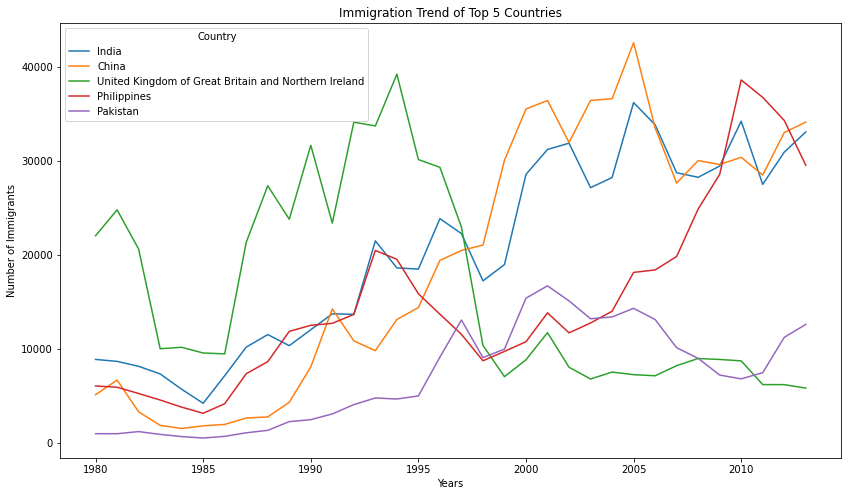

In [23]:
data_top5.plot(kind='line', figsize=(14, 8))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [24]:
# Immigration to Canada by Continent [1980 - 2013]
df_continents = data.groupby('Continent', axis = 0).sum()
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951.0,4363.0,3819.0,2671.0,2639.0,2650.0,3782.0,7494.0,7552.0,9894.0,...,27523.0,29188.0,28284.0,29890.0,34534.0,40892.0,35441.0,38083.0,38543.0,618948.0
Asia,31025.0,34314.0,30214.0,24696.0,27274.0,23850.0,28739.0,43203.0,47454.0,60256.0,...,159253.0,149054.0,133459.0,139894.0,141434.0,163845.0,146894.0,152218.0,155075.0,3317794.0
Europe,39760.0,44802.0,42720.0,24638.0,22287.0,20844.0,24370.0,46698.0,54726.0,60893.0,...,35955.0,33053.0,33495.0,34692.0,35078.0,33425.0,26778.0,29177.0,28691.0,1410947.0
Latin America and the Caribbean,13081.0,15215.0,16769.0,15427.0,13678.0,15171.0,21179.0,28471.0,21924.0,25060.0,...,24747.0,24676.0,26011.0,26547.0,26867.0,28818.0,27856.0,27173.0,24950.0,765148.0
Northern America,9378.0,10030.0,9074.0,7100.0,6661.0,6543.0,7074.0,7705.0,6469.0,6790.0,...,8394.0,9613.0,9463.0,10190.0,8995.0,8142.0,7677.0,7892.0,8503.0,241142.0
Oceania,1942.0,1839.0,1675.0,1018.0,878.0,920.0,904.0,1200.0,1181.0,1539.0,...,1585.0,1473.0,1693.0,1834.0,1860.0,1834.0,1548.0,1679.0,1775.0,55174.0


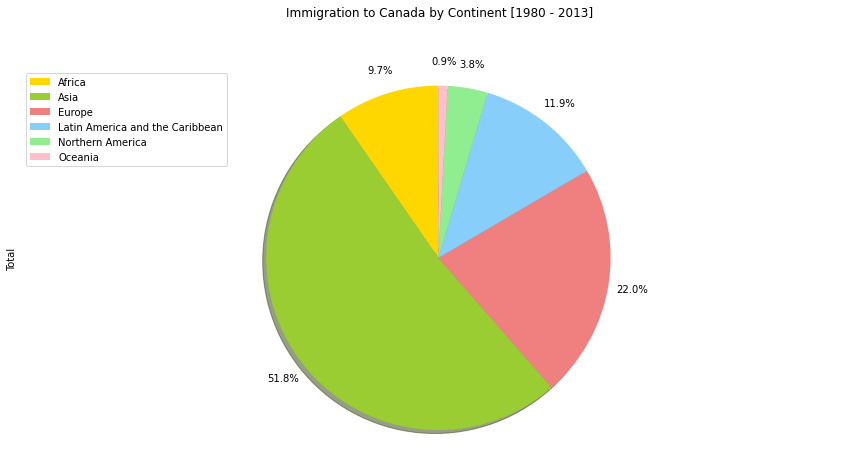

In [26]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
df_continents['Total'].plot(kind='pie',
                            figsize=(15, 7),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,           
                            labels=None,        
                            pctdistance=1.14,    
                            colors=colors_list, 
                            )
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_continents.index, loc='upper left') 
plt.show()


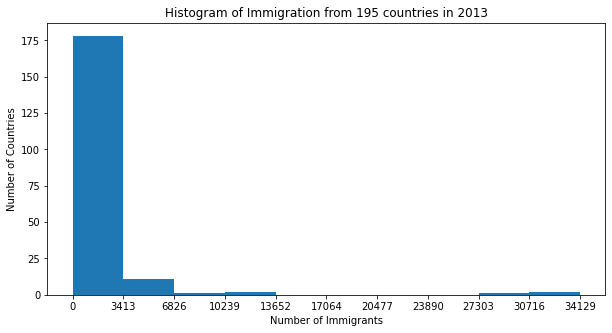

In [29]:
# Immigration from 195 countries in 2013
df_2013 = data[2013]

frequency, bin_edges = np.histogram(df_2013)
df_2013.plot(kind = 'hist' , figsize = (10,5), xticks = bin_edges)
plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries') 
plt.xlabel('Number of Immigrants') 

plt.show()

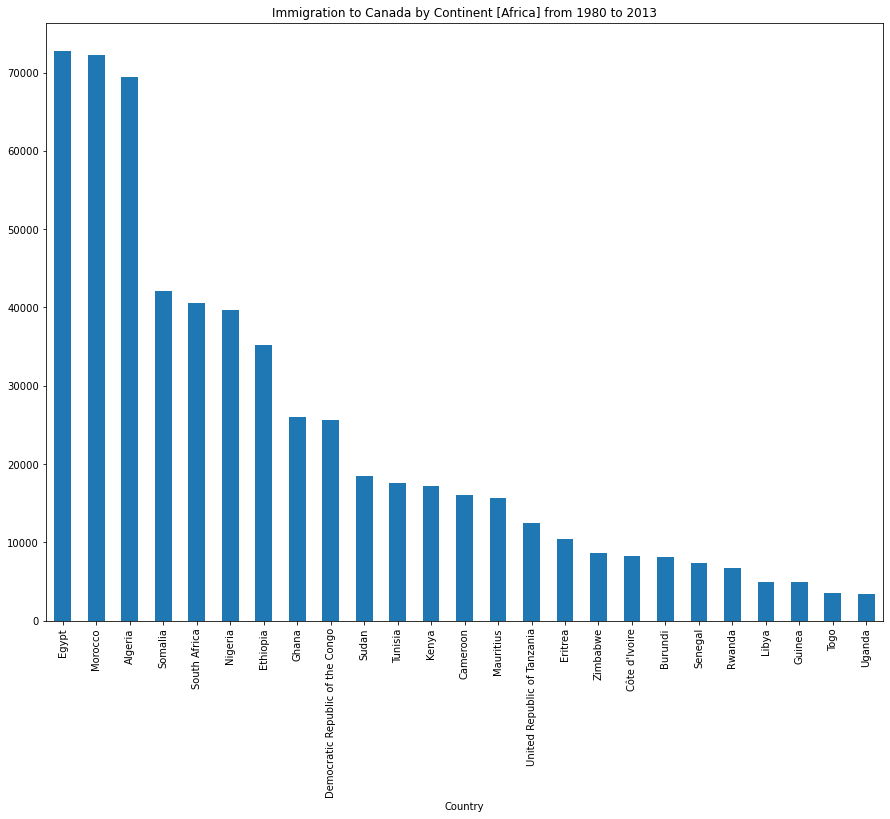

In [30]:
# Immigration to Canada by Continent [Africa] from 1980 to 2013

africa = data['Continent'] == 'Africa'
x = data[africa]
x = x.head(25)
x['Total'].plot(kind='bar',figsize=(15, 11))
plt.title('Immigration to Canada by Continent [Africa] from 1980 to 2013' ) 

plt.show()

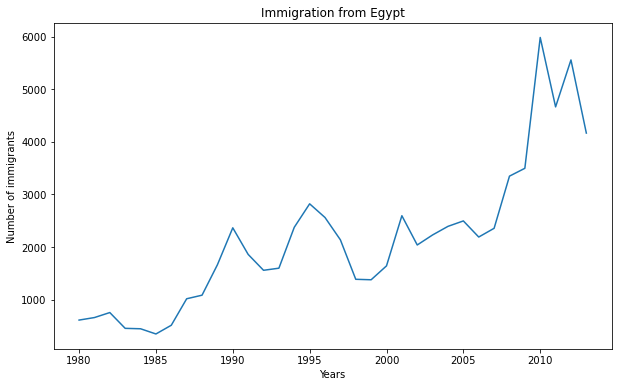

In [31]:
# Immigration from Egypt -- 1980 to 2013

egypt = data.loc['Egypt',data.columns[3:-1]]
egypt.plot(kind='line', figsize=(10,6))
plt.title('Immigration from Egypt')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

In [41]:
x = data
wc = r'world_countries.json'
world = folium.Map(location=[0,0], zoom_start=2)

world.choropleth(geo_data=wc,
                data=data,
                columns=['Country', 'Total'],
                key_on='feature.properties.name',
                fill_color='YlOrRd',
                fill_opacity=0.8,
                line_opacity=0.2,
                legend_name='Immigration to Canada'
                )
world